EN2550 - Fundementals of Image Processing and Machine Vision [Assignment 1 Intensity Transformation and Neighbourhood filtering]

Name : R.G.S.M. RANATUNGA

Index No. : 190504H

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Question 1

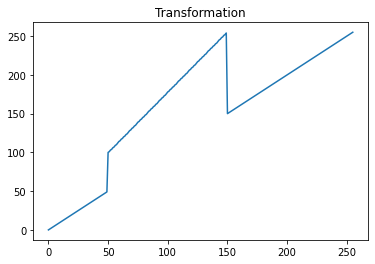

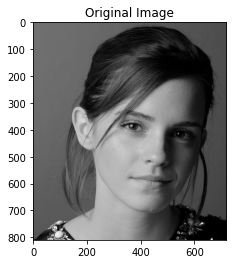

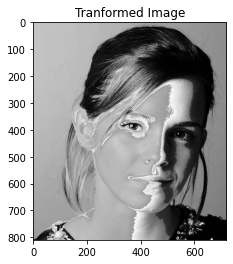

In [12]:
img_orig = cv.imread(r'./emma_gray.jpg', cv.IMREAD_GRAYSCALE)
assert img_orig is not None

# Generating the transformation
t = np.arange(0,256,dtype=np.uint8)
t[:50] = np.linspace(0,50,50,endpoint=False)
t[50:150] = np.linspace(100,256,100,endpoint=False)
t[150:] = np.linspace(150,256,106,endpoint=False)

fig,ax = plt.subplots()
ax.plot(t)
plt.title("Transformation")

img_t = cv.LUT(img_orig,t)

fig,ax = plt.subplots()
ax.imshow(cv.cvtColor(img_orig, cv.COLOR_GRAY2RGB))
plt.title("Original Image")
plt.show()

fig,ax = plt.subplots()
ax.imshow(cv.cvtColor(img_t, cv.COLOR_GRAY2RGB))
plt.title("Tranformed Image")
plt.show()

Question 2

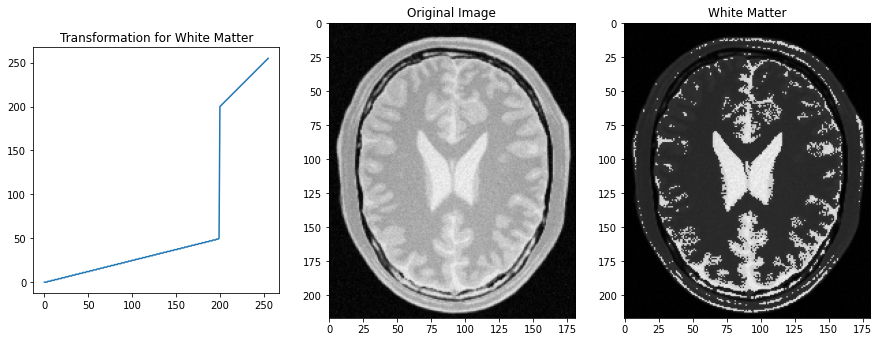

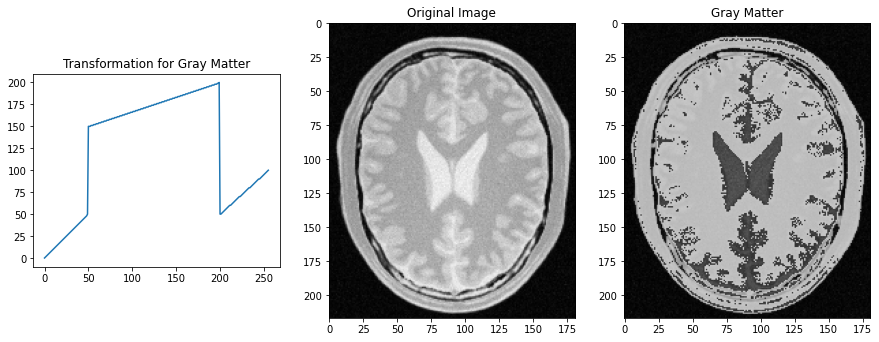

In [11]:
img_orig = cv.imread(r'./brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img_orig is not None

### Part a - White Matter ###

# Transformation for white matter
tw = np.arange(0,256,dtype=np.uint8)
tw[:200]=np.linspace(0,50,200)
tw[200:256]=np.linspace(200,255,56)
img_t = cv.LUT(img_orig,tw)

fig, ax = plt.subplots(1,3,figsize=(15,15))
ax[0].plot(tw)
ax[0].set_aspect('equal')
ax[0].set_title("Transformation for White Matter")

ax[1].imshow(cv.cvtColor(img_orig, cv.COLOR_GRAY2RGB))
ax[1].set_title("Original Image")

ax[2].imshow(cv.cvtColor(img_t, cv.COLOR_GRAY2RGB))
ax[2].set_title("White Matter")
plt.show()

### Part b - Gray Matter ###

# Transformation for gray matter
tg = np.arange(0,256,dtype=np.uint8)
tg[:50]=np.linspace(0,50,50)
tg[50:200]=np.linspace(150,200,150)
tg[200:]=np.linspace(50,100,56)
img_t = cv.LUT(img_orig,tg)

fig, ax = plt.subplots(1,3,figsize=(15,15))
ax[0].plot(tg)
ax[0].set_aspect('equal')
ax[0].set_title("Transformation for Gray Matter")

ax[1].imshow(cv.cvtColor(img_orig, cv.COLOR_GRAY2RGB))
ax[1].set_title("Original Image")

ax[2].imshow(cv.cvtColor(img_t, cv.COLOR_GRAY2RGB))
ax[2].set_title("Gray Matter")
plt.show()

Question 3

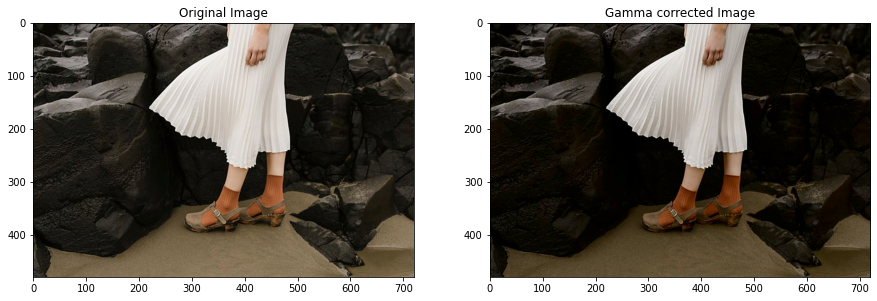

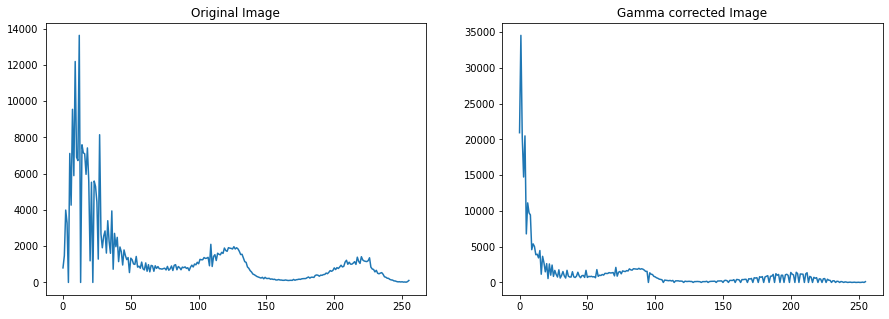

In [9]:
### Part a ###

f = cv.imread(r'./highlights_and_shadows.jpg', cv.IMREAD_COLOR)
assert f is not None

# Convert to L*a*b* color space
f = cv.cvtColor(f, cv.COLOR_BGR2Lab)

# Applying gamma correction
gamma = 1.5
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8') 
# Applying Gamma correction to the L field only
L = cv.LUT(f[:,:,0],table).reshape(480,720,1) 

f_gamma = np.concatenate([L,f[:,:,1:]],-1) 

fig,ax = plt.subplots(1,2,figsize = (15,5))
ax[0].imshow(cv.cvtColor(f, cv.COLOR_Lab2RGB))
ax[0].set_title("Original Image")

ax[1].imshow(cv.cvtColor(f_gamma, cv.COLOR_Lab2RGB))
ax[1].set_title("Gamma corrected Image")
plt.show()

### Part b ###

hist_f = cv.calcHist([f],[0], None,[256],[0,256]) # Original Histogram
hist_f_gamma = cv.calcHist([f_gamma],[0], None,[256],[0,256]) # Corrected Histogram

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].set_title("Original Image")
ax[0].plot(hist_f)
ax[1].set_title("Gamma corrected Image")
ax[1].plot(hist_f_gamma)
plt.show()


Question 4

In [3]:
def hist_eq(img):
    hist =  cv.calcHist([img],[0],None,[256],[0,256])
    cdf_hist =hist.cumsum()
    y = np.uint8(255 * (cdf_hist-np.min(cdf_hist))/(np.max(cdf_hist)-np.min(cdf_hist)))
    a, b = img.shape
    x = np.zeros_like(img)
    for i in range(0, a):
	    for j in range(0, b):
		    x[i, j] = y[img[i, j]]
    return x 

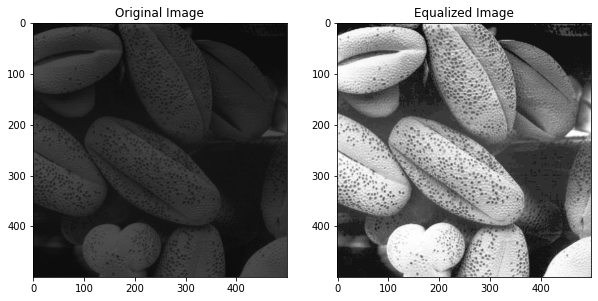

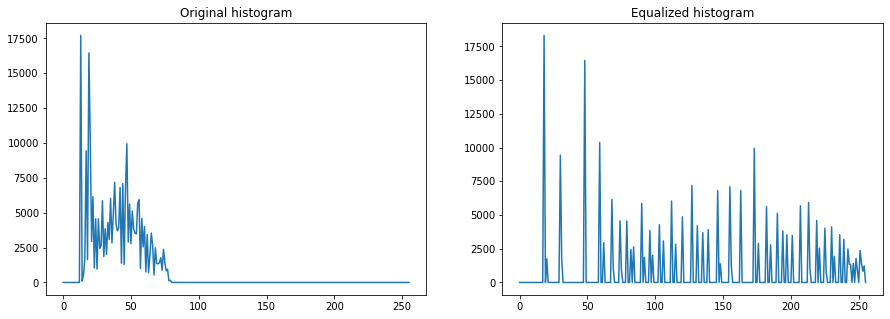

In [4]:
img_o = cv.imread(r'./shells.png', cv.IMREAD_GRAYSCALE)
assert img_o is not None

hist_o = cv.calcHist([img_o],[0],None,[256],[0,256])
img_eq = hist_eq(img_o) 
hist_e=  cv.calcHist([img_eq],[0],None,[256],[0,256])

fig,ax = plt.subplots(1,2,figsize = (10,10))

o = cv.cvtColor(img_o, cv.COLOR_BGR2RGB)
ax[0].imshow(o)
ax[0].set_title("Original Image")

e = cv.cvtColor(img_eq, cv.COLOR_BGR2RGB)
ax[1].imshow(e)
ax[1].set_title("Equalized Image")

fig,ax=plt.subplots(1,2,figsize=(15,5))

ax[0].plot(hist_o)
ax[0].set_title("Original histogram")
ax[1].plot(hist_e)
ax[1].set_title("Equalized histogram")

plt.show()


Question 5

In [21]:
### Part a ###

def nearest_neighbour(img,scale):
    r = int(scale*img.shape[0])
    c = int(scale*img.shape[1])
    channels = img.shape[2]
    zoomed = np.zeros((r,c,channels),dtype=img.dtype)
    for x in range(0,channels):
        for i in range(0,r):
            for j in range(0,c):
                zoomed[i,j,x]=img[int(i/scale),int(j/scale),x]
    return zoomed

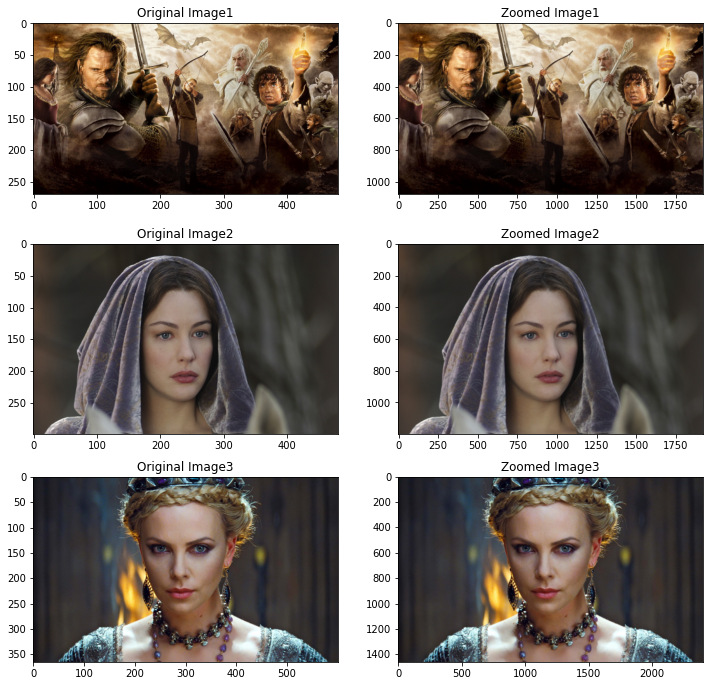

In [22]:
img1= cv.imread(r"a1q5images\im01small.png",cv.IMREAD_ANYCOLOR).astype(np.uint8)
assert img1 is not None
img2= cv.imread(r"a1q5images\im02small.png",cv.IMREAD_ANYCOLOR).astype(np.uint8)
assert img2 is not None
img3= cv.imread(r"a1q5images\im03small.png",cv.IMREAD_ANYCOLOR).astype(np.uint8)
assert img3 is not None

z1 = nearest_neighbour(img1,4)
z2 = nearest_neighbour(img2,4)
z3 = nearest_neighbour(img3,4)

fig,ax = plt.subplots(3,2,figsize=(12,12))

img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
z1 = cv.cvtColor(z1,cv.COLOR_BGR2RGB)
ax[0][0].imshow(img1)
ax[0][0].set_title("Original Image1")
ax[0][1].imshow(z1)
ax[0][1].set_title("Zoomed Image1")

img2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
z2 = cv.cvtColor(z2,cv.COLOR_BGR2RGB)
ax[1][0].imshow(img2)
ax[1][0].set_title("Original Image2")
ax[1][1].imshow(z2)
ax[1][1].set_title("Zoomed Image2")

img3 = cv.cvtColor(img3,cv.COLOR_BGR2RGB)
z3 = cv.cvtColor(z3,cv.COLOR_BGR2RGB)
ax[2][0].imshow(img3)
ax[2][0].set_title("Original Image3")
ax[2][1].imshow(z3)
ax[2][1].set_title("Zoomed Image3")


plt.show()

In [23]:
# Calculating SSD for nearest neighbour 
img1_L = cv.imread(r"a1q5images\im01.png",cv.IMREAD_ANYCOLOR).astype(np.uint8)
assert img1_L is not None
img2_L = cv.imread(r"a1q5images\im02.png",cv.IMREAD_ANYCOLOR).astype(np.uint8)
assert img2_L is not None
img3_L = cv.imread(r"a1q5images\im03.png",cv.IMREAD_ANYCOLOR).astype(np.uint8)
assert img3_L is not None

ssd_1 = np.sum(((img1_L[:,:]-z1[:,:])**2)/(3*255**2))/(img1_L.shape[0]*img1_L.shape[1])
ssd_2 = np.sum(((img2_L[:,:]-z2[:,:])**2)/(3*255**2))/(img2_L.shape[0]*img2_L.shape[1])

print("SSD - Image 1:", ssd_1)
print("SSD - Image 2:", ssd_2)

SSD - Image 1: 0.001292024093890763
SSD - Image 2: 0.0007839188275164825


In [25]:
### Part b ###

def bilinear_interpolation(img,scale):
    r = int(scale*img.shape[0])
    c = int(scale*img.shape[1])
    
    zoomed = cv.resize(img,(c,r),interpolation = cv.INTER_LINEAR)
    return zoomed

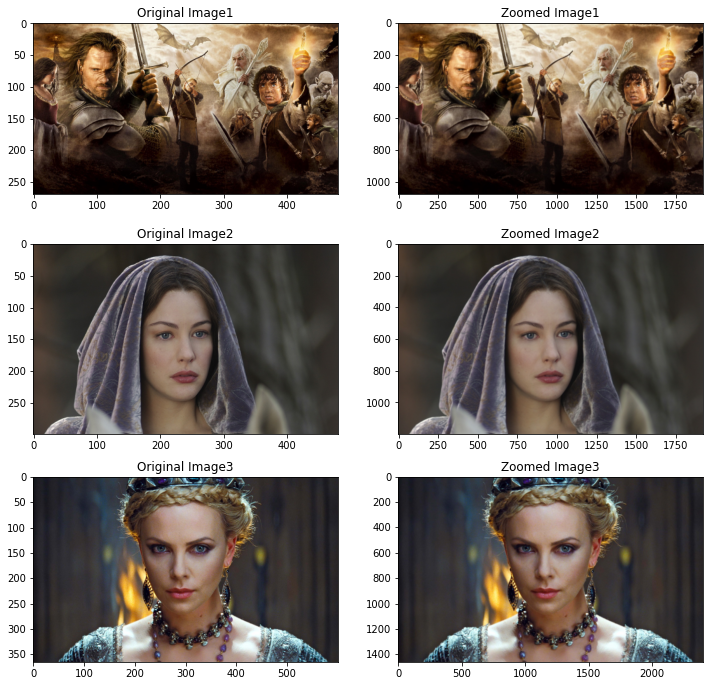

In [27]:
zB1 = bilinear_interpolation(img1,4)
zB2 = bilinear_interpolation(img2,4)
zB3 = bilinear_interpolation(img3,4)

fig,ax = plt.subplots(3,2,figsize=(12,12))

img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
zB1 = cv.cvtColor(zB1,cv.COLOR_BGR2RGB)
ax[0][0].imshow(img1)
ax[0][0].set_title("Original Image1")
ax[0][1].imshow(zB1)
ax[0][1].set_title("Zoomed Image1")

img2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
zB2 = cv.cvtColor(zB2,cv.COLOR_BGR2RGB)
ax[1][0].imshow(img2)
ax[1][0].set_title("Original Image2")
ax[1][1].imshow(zB2)
ax[1][1].set_title("Zoomed Image2")

img3 = cv.cvtColor(img3,cv.COLOR_BGR2RGB)
zB3 = cv.cvtColor(zB3,cv.COLOR_BGR2RGB)
ax[2][0].imshow(img3)
ax[2][0].set_title("Original Image3")
ax[2][1].imshow(zB3)
ax[2][1].set_title("Zoomed Image3")

plt.show()

In [28]:
ssdB_1 = np.sum(((img1_L[:,:]-zB1[:,:])**2)/(3*255**2))/(img1_L.shape[0]*img1_L.shape[1])
ssdB_2 = np.sum(((img2_L[:,:]-zB2[:,:])**2)/(3*255**2))/(img2_L.shape[0]*img2_L.shape[1])

print("SSD - Image 1:", ssdB_1)
print("SSD - Image 2:", ssdB_2)

SSD - Image 1: 0.0012918252125448735
SSD - Image 2: 0.0007750037134043885


Question 6

Text(0.5, 1.0, 'Sobel horizontal')

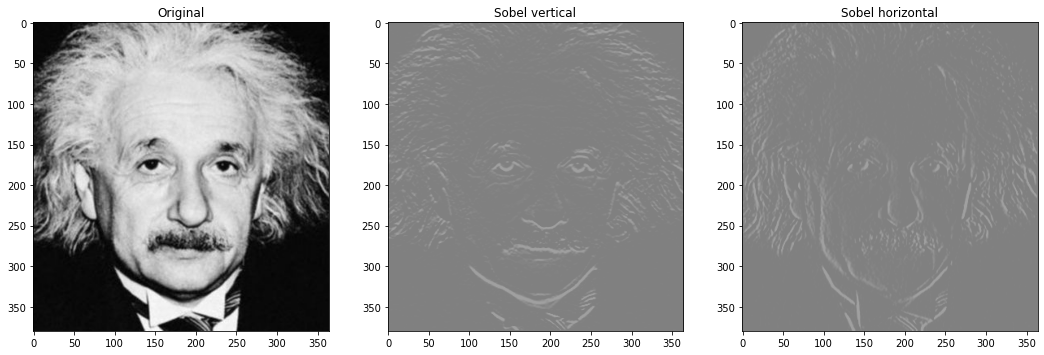

In [29]:
### Part a ###

img = cv.imread(r'./einstein.png', cv.IMREAD_GRAYSCALE)
assert img is not None

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype = np.float32)
img_x = cv.filter2D(img, -1, sobel_v)

sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype = np.float32)
img_y = cv.filter2D(img, -1, sobel_h)

fig, ax = plt.subplots(1,3, figsize=(18,6))
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[1].imshow(img_x, cmap='gray', vmin=-1020, vmax=1020)
ax[1].set_title('Sobel vertical')
ax[2].imshow(img_y, cmap='gray', vmin=-1020, vmax=1020)
ax[2].set_title('Sobel horizontal')

plt.show()

In [31]:
### Part b ###

def convolve_2d(image, kernel):
    a, b = np.shape(kernel)
    x, y = np.shape(image)
    new_img=np.pad(image, ((a//2, a//2), (b//2, b//2)),'constant', constant_values=(0,0) )
    out_img = np.zeros((np.shape(image)))
    kernel = np.flipud(np.fliplr(kernel))
    
    for i in range(y):
        for j in range(x):
            out_img[j][i] =  np.sum(new_img[j:j+a, i:i+b]*kernel) 
            
    return out_img

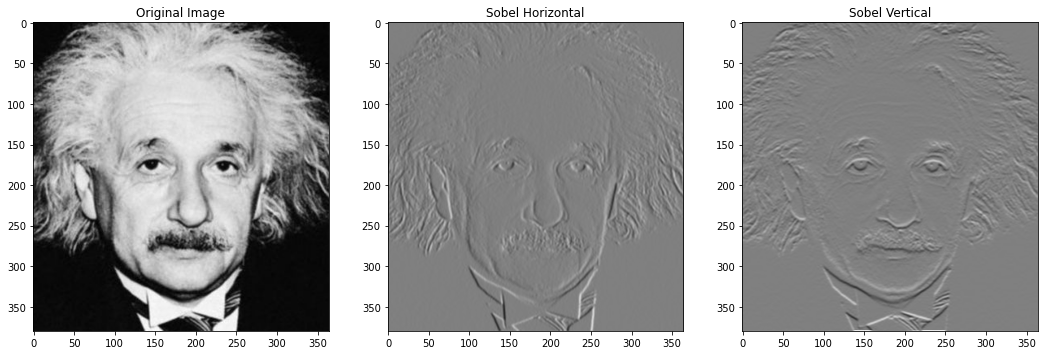

In [33]:
sobel_v=  np.array([(-1,-2,-1),(0,0,0),(1,2,1)],dtype=float)
sobel_h = np.array([(-1,0,1),(-2,0,2),(-1,0,1)],dtype=float)

f_y= convolve_2d(img,sobel_h)
f_x= convolve_2d(img,sobel_v)

fig,ax = plt.subplots(1,3,figsize=(18,6))
ax[0].imshow(img, cmap="gray",vmin=0,vmax=255)
ax[0].set_title("Original Image")

ax[1].imshow(f_y, cmap="gray",vmin=-1020,vmax=1020)
ax[1].set_title("Sobel Horizontal")

ax[2].imshow(f_x, cmap="gray",vmin=-1020,vmax=1020)
ax[2].set_title("Sobel Vertical")

plt.show()

In [ ]:
### Part c ###


Question 7

Text(0.5, 1.0, 'Background')

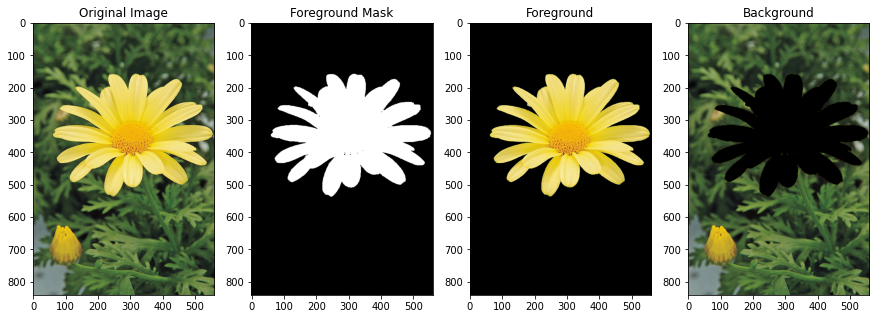

In [37]:
### Part a ###

img = cv.imread(r'./daisy.jpg')
assert img is not None

mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (40, 150, 560, 500)

# Apply GrabCut using the the bounding box segmentation method
(mask, bgdModel, fgdModel) = cv.grabCut(img, mask, rect, bgdModel, fgdModel, 5, mode=cv.GC_INIT_WITH_RECT)

# Mask for the foreground
f_mask = (mask == cv.GC_PR_FGD).astype("uint8") * 255
fout_mask= (np.where((mask == cv.GC_BGD) | (mask == cv.GC_PR_BGD), 0, 1)*255).astype(np.uint8)
foreground = cv.bitwise_and(img, img, mask=fout_mask) 

# Mask for the background
b_mask = (mask == cv.GC_PR_BGD).astype("uint8") * 255
bout_mask = (np.where((mask == cv.GC_FGD) | (mask == cv.GC_PR_FGD), 0, 1)*255).astype(np.uint8)
background = cv.bitwise_and(img, img, mask=bout_mask) 

fig,ax = plt.subplots(1,4,figsize = (15,5))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(cv.cvtColor(f_mask, cv.COLOR_BGR2RGB))
ax[1].set_title("Foreground Mask")
ax[2].imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
ax[2].set_title("Foreground")
ax[3].imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB))
ax[3].set_title("Background")



In [ ]:
### Part b ###

